In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time

import os, sys
import time
import pandas as pd
import matplotlib.pyplot as plt
# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

import pipeline

In [68]:
from modules.adaptive.filters.collaborative import CollaborativeFiltering
from modules.personalization.recommender import Recommender
from surprise import SVD

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
svd_params = {
    'n_factors': 200,
    'n_epochs': 100,
    'lr_all': 0.01,
    'reg_all': 0.1
}
model = CollaborativeFiltering(
    algorithm=SVD(**svd_params),
    ratings_file='../storage/u.data_train_temp',
    metadata_file='../storage/u.item'
)
model.fit()

recommender = Recommender(model=model)
# rankings = recommender.rank_items(user_id=196, top_n=10)
# print(rankings)

In [71]:
from modules.collaborative_filtering import CollaborativeFiltering
import pipeline
#load the dataset
pline = pipeline.Pipeline()
cols = ['user', 'item', 'rating', 'timestamp']
df = pline.load_dataset('../storage/u.data_train_temp', column_names = cols)

In [72]:
#evaluate using the test set
# trs = []
# prs = []
baseline_rmses = []
for _, row in df.iterrows():
    user_id, item_id, true_rating = row['user'], row['item'], row['rating']
    try:
        predicted_rating = model.predict(user_id, item_id)
        # trs.append(true_rating)
        # prs.append(predicted_rating)
        baseline_rmse = np.sqrt(np.abs(true_rating - predicted_rating))
        baseline_rmses.append(baseline_rmse)
    except:
        pass

In [73]:
#production rmse
# baseline_rmse = np.sqrt(mean_squared_error(trs, prs))

In [74]:
df_test = pline.load_dataset('../storage/u.data_test_temp', column_names = cols)
#evaluate using the test set
# trs = []
# prs = []
production_rmses = []
for _, row in df_test.iterrows():
    user_id, item_id, true_rating = row['user'], row['item'], row['rating']
    try:
        predicted_rating = model.predict(user_id, item_id)
        # trs.append(true_rating)
        # prs.append(predicted_rating)
        production_rmse = np.sqrt(np.abs(true_rating - predicted_rating))
        production_rmses.append(production_rmse)
    except:
        pass
# #production rmse
# production_rmse = np.sqrt(mean_squared_error(trs, prs))

In [82]:
from modules.adaptive.continuous_learning import ContinuousLearner

learner = ContinuousLearner(baseline_rmse=baseline_rmses)
retrain, pvalue = learner.detect_drift(production_rmses, return_pvalue = True)

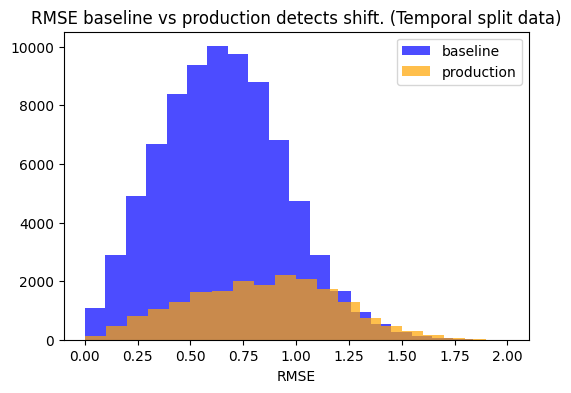

In [87]:
# Plot histograms
plt.figure(figsize = (6, 4))
plt.hist(baseline_rmses, color='blue', label='baseline', alpha=0.7, bins = 20)
plt.hist(production_rmses, color='orange', label='production', alpha=0.7, bins = 20)
plt.xlabel('RMSE')
plt.legend()
plt.title('RMSE baseline vs production detects shift. (Temporal split data)')
plt.show()

In [84]:
retrain

True

In [26]:
import requests
import time

response_times = []

for i in range(0, 900):

    # Define the URL and parameters
    url = "http://localhost:5000/recommend?user_id={i}"
    # params = {"user_id": 780}  # Query parameters

    # Measure time taken for the request
    start_time = time.time()
    response = requests.get(url)
    end_time = time.time()

    elapsed_time = end_time - start_time

    response_times.append(elapsed_time)

Text(0.5, 1.0, 'Docker Recommendation Response Time Distribution')

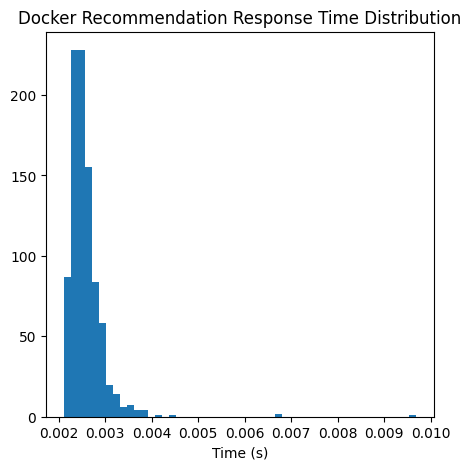

In [31]:

plt.figure(figsize = (5, 5))
plt.hist(response_times, bins = 50)
plt.xlabel('Time (s)')
plt.title('Docker Recommendation Response Time Distribution')